In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split

# import tensorflow as tf

In [4]:
df = pd.read_parquet("full_df.parquet.gzip")

In [ ]:
non_pred_cols = [
    "new_ind",
    "index",
    "ADM1DHS",
    "ADM1FIPS",
    "ADM1FIPSNA",
    "ADM1NAME",
    "ADM1SALBCO",
    "ADM1SALBNA",
    "ADM1SALNA",
    "ALT_DEM",
    "ALT_GPS",
    "CCFIPS",
    "DATUM",
    "DHSCC",
    "DHSCLUST",
    "DHSID",
    "DHSREGCO",
    "DHSREGNA",
    "DHSYEAR",
    "F21",
    "F22",
    "F23",
    "LATNUM",
    "LONGNUM",
    "SOURCE",
    "URBAN_RURA",
    "ZONECO",
    "ZONENA",
]

In [3]:
df

,new_ind,index,ADM1DHS,ADM1FIPS,ADM1FIPSNA,ADM1NAME,ADM1SALBCO,ADM1SALBNA,ADM1SALNA,ALT_DEM,...,LATNUM_y,LONGNUM_y,Mean_BMI,Median_BMI,Unmet_Need_Rate,Under5_Mortality_Rate,Skilled_Birth_Attendant_Rate,Stunted_Rate,Fully_Vaccinated_Children_Rate,URBAN_RURA_y
0,AL200800000001,0,9999,None,None,None,None,None,NaN,45.0,...,40.822652,19.838321,24.12,25.28,50.00,9.68,100.00,20.00,NaN,R
1,AL200800000002,40,9999,None,None,None,None,None,NaN,65.0,...,40.696846,20.007555,23.04,21.98,7.69,8.33,66.67,0.00,NaN,R
2,AL200800000003,80,9999,None,None,None,None,None,NaN,261.0,...,40.750037,19.974262,22.91,23.47,11.11,0.00,100.00,0.00,NaN,R
3,AL200800000004,120,9999,None,None,None,None,None,NaN,29.0,...,40.798931,19.863338,26.74,26.57,7.69,2.86,100.00,0.00,NaN,R
4,AL200800000005,160,9999,None,None,None,None,None,NaN,130.0,...,40.746123,19.843885,24.51,22.60,12.50,0.00,100.00,33.33,NaN,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120981,ZW201500000396,184,9,None,None,Harare,None,None,NaN,1482.0,...,-17.915288,31.156115,23.16,22.14,33.33,2.04,78.95,25.00,0.0,U
120982,ZW201500000397,221,1,None,None,Manicaland,None,None,NaN,1448.0,...,-18.379501,31.872287,24.33,22.61,11.11,1.75,76.19,22.22,0.0,R
120983,ZW201500000398,258,4,None,None,Mashonaland West,None,None,NaN,1182.0,...,-16.660612,29.850649,23.70,21.44,10.53,4.88,68.00,17.65,0.0,R
120984,ZW201500000399,295,9,None,None,Harare,None,None,NaN,1416.0,...,-17.914251,30.956975,26.55,24.80,11.11,1.96,94.44,0.00,0.0,U


In [4]:
df[['SOURCE']].value_counts()

SOURCE
GPS       100671
GAZ        10986
CEN         8155
MIS         1174
dtype: int64

In [ ]:
na = df.isna().mean()
na = na.sort_values()

In [ ]:
#Remove columns with too many NaNs
# keep_cols = na[na < 0.53].keys()
drop_cols = na[na >= 0.53].keys()

In [ ]:
# df_impute = df[keep_cols]
df = df.drop(drop_cols, axis=1)

In [15]:
df.columns[df.columns.str.startswith("DHS")]

Index(['DHSCC', 'DHSCLUST_x', 'DHSID_x', 'DHSREGCO', 'DHSREGNA', 'DHSYEAR_x',
       'DHSID_y', 'DHSYEAR_y', 'DHSCLUST_y'],
      dtype='object')

In [19]:
tmp = df[["DHSYEAR_x","DHSYEAR_y"]]
tmp[tmp["DHSYEAR_x"].isna()]


,DHSYEAR_x,DHSYEAR_y


In [20]:
df["key1"].value_counts()

IA    27743
EG     7845
PE     5374
CO     4987
NG     3831
DR     3494
GH     2950
BD     2922
PH     2861
MW     2780
KE     2392
ET     2313
ZM     2306
KH     2250
UG     2236
JO     2234
SN     2173
ML     1867
BJ     1752
RW     1695
CM     1623
HT     1552
PK     1533
ZA     1492
ZW     1434
ID     1392
SL     1364
BF     1361
NM     1310
GN     1289
LS     1204
MZ     1187
NP     1183
AL     1165
HN     1148
BO     1001
BU      930
TL      910
MD      863
GU      858
CD      836
MB      800
LB      776
TG      771
CI      737
TJ      722
AO      625
TD      624
AM      621
TZ      608
NI      503
MA      480
MM      441
GA      336
GY      325
SZ      275
KM      252
CF      231
UZ      219
Name: key1, dtype: int64

In [8]:
df.dtypes[df.dtypes==object]

new_ind         object
ADM1NAME        object
CCFIPS          object
DATUM           object
DHSCC           object
DHSID_x         object
DHSREGNA        object
SOURCE          object
URBAN_RURA_x    object
key1            object
DHSID_y         object
URBAN_RURA_y    object
dtype: object

In [4]:
country_couts = df["key1"].value_counts()

In [ ]:
apply(lambda g: g[g['B'] == g['B'].max()]

In [5]:
country_couts

IA    27743
EG     7845
PE     5374
CO     4987
NG     3831
DR     3494
GH     2950
BD     2922
PH     2861
MW     2780
KE     2392
ET     2313
ZM     2306
KH     2250
UG     2236
JO     2234
SN     2173
ML     1867
BJ     1752
RW     1695
CM     1623
HT     1552
PK     1533
ZA     1492
ZW     1434
ID     1392
SL     1364
BF     1361
NM     1310
GN     1289
LS     1204
MZ     1187
NP     1183
AL     1165
HN     1148
BO     1001
BU      930
TL      910
MD      863
GU      858
CD      836
MB      800
LB      776
TG      771
CI      737
TJ      722
AO      625
TD      624
AM      621
TZ      608
NI      503
MA      480
MM      441
GA      336
GY      325
SZ      275
KM      252
CF      231
UZ      219
Name: key1, dtype: int64

In [3]:
df[["DHSYEAR_x", "key1"]][df["key1"]=="AL"]["DHSYEAR_x"].value_counts()

2017    715
2008    450
Name: DHSYEAR_x, dtype: int64

In [5]:
def get_last(g):
    idx = len(g)//10
    return g[-idx:]


#Assume the year is already sorted
test = df.groupby(["key1"]).apply(get_last)

In [6]:
test.to_parquet("test_20221130.parquet.gzip", compression="gzip")

In [7]:
del test

In [9]:
def remove_last(g):
    idx = len(g)//10
    return g[:-idx]
train_dev = df.groupby(["key1"]).apply(remove_last)
train, dev = train_test_split(train_dev, test_size=0.1111, stratify=train_dev["key1"])

In [10]:
train.to_parquet("train_20221130.parquet.gzip", compression="gzip")
dev.to_parquet("dev_20221130.parquet.gzip", compression="gzip")

In [18]:
tmp["DHSYEAR_x"]

115535    2002
115536    2002
115537    2002
115538    2002
115539    2002
          ... 
115749    2002
115750    2002
115751    2002
115752    2002
115753    2002
Name: DHSYEAR_x, Length: 219, dtype: int64

In [10]:
impute_na = df.isna().sum()
impute_na = impute_na[impute_na > 0]

In [20]:
# df_impute = df[keep_cols]

for col in tqdm(impute_na.keys()):
    if df_impute[col].dtype != object:
        mean = df_impute[col].mean()
        df_impute[col].fillna(mean, inplace=True)

  0%|                                                                                                                          | 0/27 [00:00<?, ?it/s]/var/folders/px/gt6gy3zd5x13r8x0w55jyt2r0000gn/T/ipykernel_14884/2985433081.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_impute[col].fillna(mean, inplace=True)
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 27/27 [00:00<00:00, 193.10it/s]


In [21]:
df_impute.to_parquet("full_df_impute.parquet.gzip", compression="gzip")

In [3]:
df_impute = pd.read_parquet("full_df_impute.parquet.gzip")

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
country = df_impute["new_ind"].apply(lambda x: x[:2])

In [8]:
train_dev, test, country_train_dev, _ = train_test_split(df_impute, country, test_size=0.1, stratify=country)
train, dev = train_test_split(train_dev, test_size=0.1, stratify=country_train_dev)

In [9]:
train.to_parquet("train_20221130.parquet.gzip", compression="gzip")
dev.to_parquet("dev_20221130.parquet.gzip", compression="gzip")
test.to_parquet("test_20221130.parquet.gzip", compression="gzip")

In [ ]:
len(train)

In [11]:
impute_na

CCFIPS                                                                                                    1258
DHSYEAR_y                                                                                                 5164
Unnamed: 0                                                                                                5164
DHSID_y                                                                                                   5164
LATNUM_y                                                                                                  5164
DHSCLUST_y                                                                                                5164
LONGNUM_y                                                                                                 5164
URBAN_RURA_y                                                                                              5164
Unmet_Need_Rate                                                                                           7067
A

In [19]:
df_impute['CCFIPS'].dtype == object

True

In [38]:
df['apr@OpenLandMap/CLM/CLM_LST_MOD11A2-DAYNIGHT_M/v01'].dtypes == pd.dtype('float64')

AttributeError: module 'pandas' has no attribute 'dtype'

In [23]:
df_impute.isna().sum().sort_values()

new_ind                                                                   0
skin_reservoir_content_max_max@ECMWF/ERA5_LAND/MONTHLY&timestamped        0
skin_reservoir_content_max_min@ECMWF/ERA5_LAND/MONTHLY&timestamped        0
skin_reservoir_content_min_max@ECMWF/ERA5_LAND/MONTHLY&timestamped        0
skin_reservoir_content_min_min@ECMWF/ERA5_LAND/MONTHLY&timestamped        0
                                                                      ...  
Stunted_Rate                                                              0
CCFIPS                                                                 1258
URBAN_RURA_y                                                           5164
DHSID_y                                                                5164
ADM1NAME                                                              15343
Length: 11364, dtype: int64

In [54]:
df_impute["Deep_Blue_Single_Scattering_Albedo_Land_Std_Deviation_Mean_412_min_min@MODIS/061/MOD08_M3&timestamped"]

0         5.0
1         5.0
2         5.0
3         5.0
4         5.0
         ... 
120981    NaN
120982    NaN
120983    3.0
120984    NaN
120985    NaN
Name: Deep_Blue_Single_Scattering_Albedo_Land_Std_Deviation_Mean_412_min_min@MODIS/061/MOD08_M3&timestamped, Length: 120986, dtype: float64

In [53]:
"Deep_Blue_Single_Scattering_Albedo_Land_Std_Deviation_Mean_412_min_min@MODIS/061/MOD08_M3&timestamped" in df_impute.columns

True

In [32]:
# with open('output.txt', 'w') as f:
#     for i in na.items():
#         f.write(str(i)+"\n")

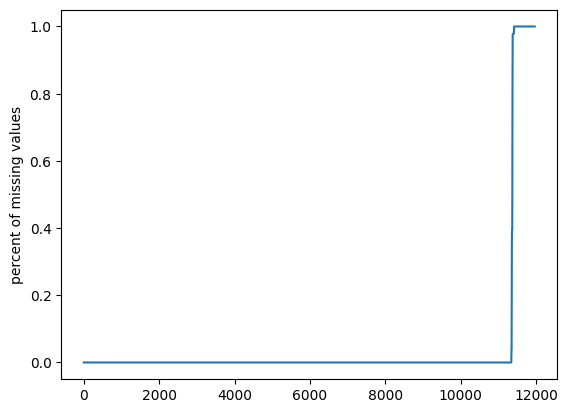

In [33]:
plt.plot(list(na))
plt.ylabel('percent of missing values')
plt.show()

In [4]:
df["country_code"] = df["new_ind"].str.slice(stop=2)

In [5]:
df[df["country_code"]=="AO"]["Mean_BMI"]

1786   NaN
1787   NaN
1788   NaN
1789   NaN
1790   NaN
        ..
2406   NaN
2407   NaN
2408   NaN
2409   NaN
2410   NaN
Name: Mean_BMI, Length: 625, dtype: float64

<AxesSubplot: >

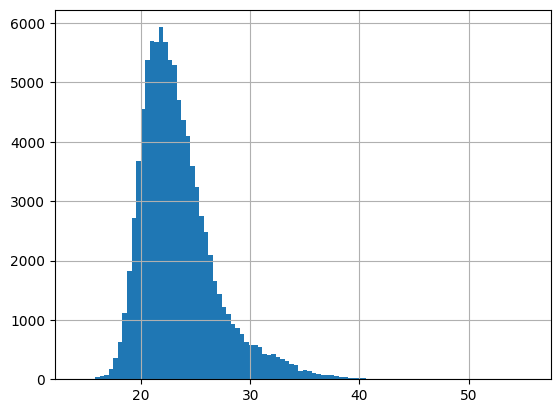

In [6]:
df["Mean_BMI"].hist(bins=100)

<AxesSubplot: >

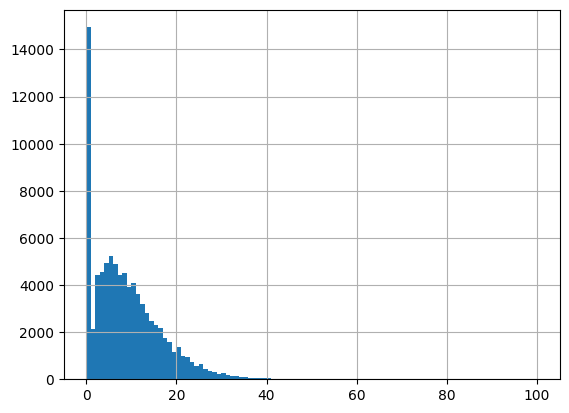

In [7]:
df["Under5_Mortality_Rate"].hist(bins=100)

<AxesSubplot: >

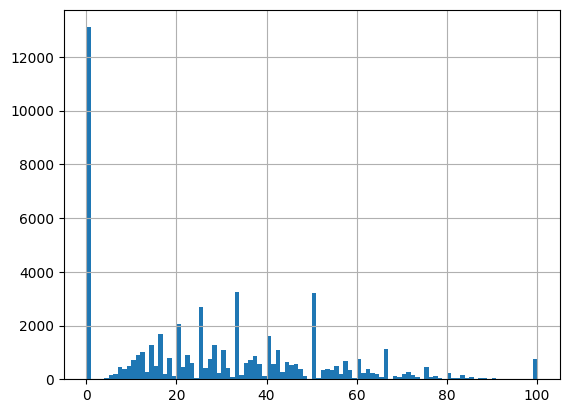

In [8]:
df["Stunted_Rate"].hist(bins=100)

In [15]:
counts = df[["Mean_BMI", "new_ind", "country_code"]].groupby("country_code").count()

In [20]:
counts["percent"] = counts["Mean_BMI"]/counts["new_ind"]*100

In [33]:
counts[counts["percent"] <70] 

,Mean_BMI,new_ind,percent
country_code,,,
AM,313,621,50.402576
AO,0,625,0.000000
BD,1922,2922,65.776865
BJ,995,1752,56.792237
CF,0,231,0.000000
CI,482,737,65.400271
DR,637,3494,18.231254
GH,1243,2950,42.135593
ID,0,1392,0.000000


In [30]:
counts

,Mean_BMI,new_ind,percent
country_code,,,
AL,1160,1165,99.570815
AM,313,621,50.402576
AO,0,625,0.000000
BD,1922,2922,65.776865
BF,1035,1361,76.047024
BJ,995,1752,56.792237
BO,999,1001,99.800200
BU,919,930,98.817204
CD,829,836,99.162679


Text(0, 0.5, 'Num countries')

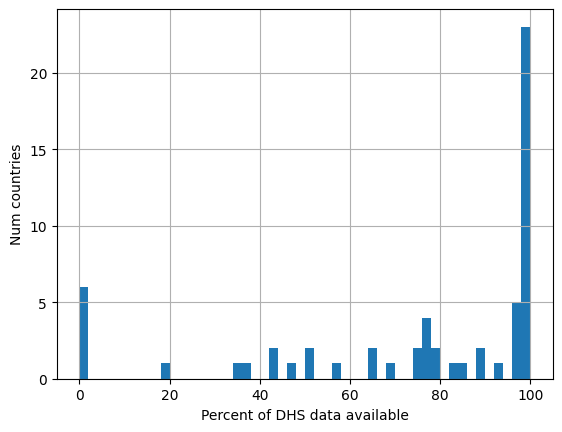

In [40]:
ax =  counts["percent"].hist(bins=50)

ax.set_xlabel('Percent of DHS data available')
ax.set_ylabel('Num countries')

In [26]:
df_in = df[df['new_ind'].str.startswith("IN")]

In [27]:
df_in

,new_ind,index,ADM1DHS,ADM1FIPS,ADM1FIPSNA,ADM1NAME,ADM1SALBCO,ADM1SALBNA,ADM1SALNA,ALT_DEM,...,LATNUM_y,LONGNUM_y,Mean_BMI,Median_BMI,Unmet_Need_Rate,Under5_Mortality_Rate,Skilled_Birth_Attendant_Rate,Stunted_Rate,Fully_Vaccinated_Children_Rate,URBAN_RURA_y


In [13]:
df['Under5_Mortality_Rate'].isna().sum()

34036

In [15]:
34036/len(df)

0.2813218058287736

In [14]:
df['Under5_Mortality_Rate'].isna().sum()

34036

In [20]:
df.head()

,new_ind,index,ADM1DHS,ADM1FIPS,ADM1FIPSNA,ADM1NAME,ADM1SALBCO,ADM1SALBNA,ADM1SALNA,ALT_DEM,...,LATNUM_y,LONGNUM_y,Mean_BMI,Median_BMI,Unmet_Need_Rate,Under5_Mortality_Rate,Skilled_Birth_Attendant_Rate,Stunted_Rate,Fully_Vaccinated_Children_Rate,URBAN_RURA_y
0,AL200800000001,0,9999,None,None,None,None,None,NaN,45.0,...,40.822652,19.838321,24.12,25.28,50.00,9.68,100.00,20.00,NaN,R
1,AL200800000002,40,9999,None,None,None,None,None,NaN,65.0,...,40.696846,20.007555,23.04,21.98,7.69,8.33,66.67,0.00,NaN,R
2,AL200800000003,80,9999,None,None,None,None,None,NaN,261.0,...,40.750037,19.974262,22.91,23.47,11.11,0.00,100.00,0.00,NaN,R
3,AL200800000004,120,9999,None,None,None,None,None,NaN,29.0,...,40.798931,19.863338,26.74,26.57,7.69,2.86,100.00,0.00,NaN,R
4,AL200800000005,160,9999,None,None,None,None,None,NaN,130.0,...,40.746123,19.843885,24.51,22.60,12.50,0.00,100.00,33.33,NaN,R


In [ ]:
df["URBAN_RURA"].head()

In [33]:
df["walking_only_travel_time_100000"]

0         216.05801
1         200.14983
2         214.10818
3         216.46187
4         206.45757
            ...    
120981    111.36423
120982     81.61242
120983    136.68535
120984    126.11693
120985     91.89766
Name: walking_only_travel_time_100000, Length: 120986, dtype: float64

In [32]:
df.columns[-20:]

Index(['walking_only_travel_time_100000',
       'motorized_only_friction_surface_100000',
       'motorized_only_travel_time_100000', 'key1', 'key2', 'key3',
       'Unnamed: 0', 'DHSID_y', 'DHSYEAR_y', 'DHSCLUST_y', 'LATNUM_y',
       'LONGNUM_y', 'Mean_BMI', 'Median_BMI', 'Unmet_Need_Rate',
       'Under5_Mortality_Rate', 'Skilled_Birth_Attendant_Rate', 'Stunted_Rate',
       'Fully_Vaccinated_Children_Rate', 'URBAN_RURA_y'],
      dtype='object')

In [2]:
filenames = ["AL2008_2008_0.tfrecord"]
raw_dataset = tf.data.TFRecordDataset(filenames)

2022-10-28 01:37:22.830389: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
a = next(iter(raw_dataset.take(1)))
# for raw_record in raw_dataset.take(1):
#     a = raw_record

In [4]:
tmp = a.numpy()

In [5]:
type(tmp)

bytes

In [7]:
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont
import urllib.request
import io
import binascii

data = tmp
# r_data = binascii.unhexlify(data)
#r_data = "".unhexlify(chr(int(b_data[i:i+2],16)) for i in range(0, len(b_data),2))

stream = io.BytesIO(data)

img = Image.open(stream)
draw = ImageDraw.Draw(img)
font = ImageFont.truetype("arial.ttf",14)
draw.text((0, 220),"This is a test11",(255,255,0),font=font)
draw = ImageDraw.Draw(img)
img.save("a_test.png")

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x12e2a6b60>